<a href="https://colab.research.google.com/github/NeznaikanaLune/MISIS_DS_Masters_degree_2020/blob/master/smriz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Проблема

Несоответствие результатов эксперимента и теоретических данных

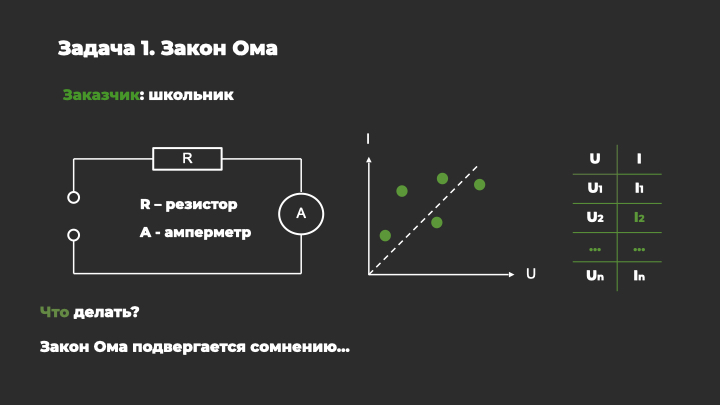

# 2. Содержательная постановка задачи

Школьник проводит эксперимент и хочет определить сопротивление резистора. Для этого у него есть источник напряжения с регулируемым напряжением и также последовательно включенный в цепь амперметр для измерения силы тока. Необходимо определить параметры функции, аппроксимирующей закон Ома. Найти сопротивление резистора такое, которое обеспечит максимальное соответствие(идентичность) между экспериментом и законом Ома).



# 3. Формальная математическая модель

$Y_{i}=b_{0}+b_{1}*X_{i}\\
Y_{i}-выход,сила тока\\
X_i-вход,напряжение в ходе эксперимента\\
b_1=1/R  -проводимость,где  R -сопротивление резистора, \\
тк I =U/R  -закон Ома\\
b_0  - сдвиг апроксимирующей прямой относительно начала координат, 
те когда напряжение 0 есть  собственный ток$

**Критерий соответствия/идентичности:**

$\sum(Y_{практические}-Y_{теоретические})^2→min\\
Y_{теоретические}=f(x_i,b)=b_0+b_1*X_i\\
F(b)= \sum(y_{практические}-f(x_i,b))^2→min$- минимизация квадрата отклонений теоретических и практических данных.

Для решения этой задачи воспользуемся методом наименьших квадратов, который сводится к решению системы уравнений.

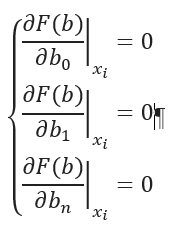

**Определить:**
$b=(b_0,b_1,b_2,…,b_n)$

n-количество измерений в эксперименте




# 4.	Алгоритм и ПО

•	Метод наименьших квадратов. Подбирает в линейную модель такие коэффициенты, при которых данные модели наименьшем образом отклоняются от теоретических

•	Python

•	Numpy - open-source модуль для python, который предоставляет общие математические и числовые операции в виде пре-скомпилированных, быстрых функций

•	Sklearn – модуль машинного обучения

# 5.	Решение задачи

In [ ]:
import numpy as np
#Задаем исходные данные для демонстрации решения задачи с применением выбранного алгоритма
U = np.array([[10],[12],[11],[19]])
I = np.array([2,5,5.5,8])
# Добавить фиктивный столбец единиц (bias линейной модели)
U = np.hstack([np.ones(U.shape[0])[:, np.newaxis], U])

In [ ]:
def calc_mse_gradient(X, y, theta):
    """Вычисления градиента функции MSE"""
    n = X.shape[0]
    grad = 1. / n * X.transpose().dot(X.dot(theta) - y)  
    return grad
def gradient_step(theta, theta_grad, alpha):
    """Функция, осуществляющая градиентный шаг
       alpha - learning rate, скорость обучения """
    return theta - alpha * theta_grad
def optimize(X, y, grad_func, start_theta, alpha, n_iters):
    """ Функция цикла градиентного спуска с доп. параметрами
        начальным вектором theta и числом итераций """
    theta = start_theta.copy()    
    for i in range(n_iters):
        theta_grad = grad_func(X, y, theta)
        theta = gradient_step(theta, theta_grad, alpha)   
    return theta
from sklearn.metrics import r2_score
theta = optimize(U, I, calc_mse_gradient, np.ones(U.shape[1]), 0.01, 10000)
y_pred = U.dot(theta)
print('b0:',theta[0],'b1:',theta[1])
print('Вектор предсказанных значений:',y_pred)
print('Ручной расчет прогноза с использованием инфо о коэффициентах линейной регрессии 1го из предсказанных значений:',theta[0]+10*theta[1])
print('Сопротивление резистора: {} Ом'.format(round(1/theta[1],2)))
mse = 1/4*sum((I-y_pred)**2)
print('MSE:',round(mse,2),'\nR2:',round(r2_score(I, y_pred),2))


b0: -1.6322704327035829 b1: 0.5198044199681691
Вектор предсказанных значений: [3.56577377 4.60538261 4.08557819 8.24401355]
Ручной расчет прогноза с использованием инфо о коэффициентах линейной регрессии 1го из предсказанных значений: 3.565773766978108
Сопротивление резистора: 1.92 Ом
MSE: 1.17 
R2: 0.74


# 6.	Анализ полученных результатов

Найдены значения b0 и b1, что и требовалось в задаче. В "игрушечном" примере продеменстрирован один из способов реализации метода наименьших квадратов с оптимизацией градиентным спуском. Получены результаты с коэффициентом детирминации 0.74, такой результат обусловлен тем, что набора данных был "игрушечным", основная цель - демонстрация работы решения.